+-------+------+------+------+
|    HEX|avg(R)|avg(G)|avg(B)|
+-------+------+------+------+
|#3366CC|  51.0| 102.0| 204.0|
|#3333FF|  51.0|  51.0| 255.0|
|#00CC99|   0.0| 204.0| 153.0|
|#000066|   0.0|   0.0| 102.0|
|#663300| 102.0|  51.0|   0.0|
|#339933|  51.0| 153.0|  51.0|
|#339900|  51.0| 153.0|   0.0|
|#3399CC|  51.0| 153.0| 204.0|
|#660066| 102.0|   0.0| 102.0|
|#00FF99|   0.0| 255.0| 153.0|
|#33FF66|  51.0| 255.0| 102.0|
|#0099CC|   0.0| 153.0| 204.0|
|#33FF33|  51.0| 255.0|  51.0|
|#33CCCC|  51.0| 204.0| 204.0|
|#00CCFF|   0.0| 204.0| 255.0|
|#00CC33|   0.0| 204.0|  51.0|
|#6600FF| 102.0|   0.0| 255.0|
|#0066CC|   0.0| 102.0| 204.0|
|#009966|   0.0| 153.0| 102.0|
|#33FF00|  51.0| 255.0|   0.0|
+-------+------+------+------+
only showing top 20 rows

 Color runtime: 1.24 seconds
+--------+------------------+
|    Food|        avg(Price)|
+--------+------------------+
|    Taco|5.1225000000000005|
|  Burger|             8.875|
|   Pizza|13.120000000000001|
|   Pasta|10.91666666

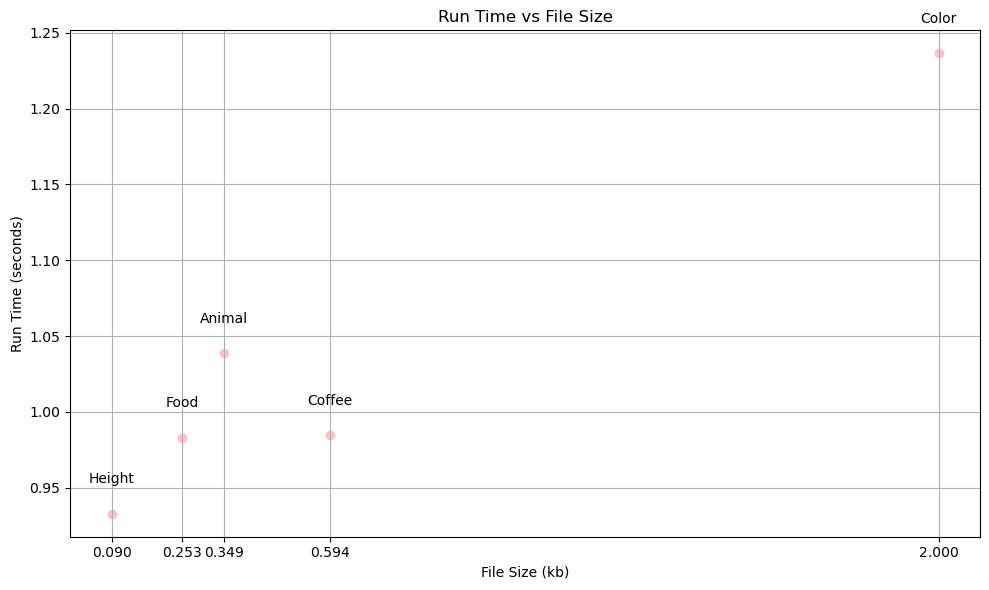

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract
import time
import matplotlib.pyplot as plt

#start
spark = SparkSession.builder.appName("MYAPP").getOrCreate()

#color
start_time = time.time()
df_color = spark.read.csv("gs://dataproc-staging-us-central1-686785237252-brte7klm/color - Sheet1.csv", header=True, inferSchema=True)
df_color = df_color.withColumn("R", regexp_extract("RGB", r'rgb\((\d+),', 1).cast("int")) \
                   .withColumn("G", regexp_extract("RGB", r'rgb\(\d+,(\d+),', 1).cast("int")) \
                   .withColumn("B", regexp_extract("RGB", r'rgb\(\d+,\d+,(\d+)\)', 1).cast("int"))
df_color.groupBy("HEX").avg("R", "G", "B").show()
color_time = time.time() - start_time
print(f" Color runtime: {color_time:.2f} seconds")

#food
start_time = time.time()
df_food = spark.read.csv("gs://dataproc-staging-us-central1-686785237252-brte7klm/food - Sheet1.csv", header=True, inferSchema=True)
df_food.groupBy("Food").avg("Price").show()
food_time = time.time() - start_time
print(f" Food runtime: {food_time:.2f} seconds")

#animal
start_time = time.time()
df_animal = spark.read.csv("gs://dataproc-staging-us-central1-686785237252-brte7klm/animal - Sheet1.csv", header=True, inferSchema=True)
df_animal.groupBy("Animal").avg("Weight").show()
animal_time = time.time() - start_time
print(f" Animal runtime: {animal_time:.2f} seconds")

#height
start_time = time.time()
df_height = spark.read.csv("gs://dataproc-staging-us-central1-686785237252-brte7klm/height - Sheet1.csv", header=True, inferSchema=True)
df_height.groupBy("Age").avg("Height").show()
height_time = time.time() - start_time
print(f" Height runtime: {height_time:.2f} seconds")

#coffee
start_time = time.time()
df_coffee = spark.read.csv("gs://dataproc-staging-us-central1-686785237252-brte7klm/coffee - Sheet1.csv", header=True, inferSchema=True)
df_coffee.groupBy("Store").avg("Caffeine").show()
coffee_time = time.time() - start_time
print(f" Coffee runtime: {coffee_time:.2f} seconds")

#scatter plot
labels = ["Color", "Food", "Animal", "Height", "Coffee"]
sizes = [2, .253, .349, .09, .594]  
runtimes = [color_time, food_time, animal_time, height_time, coffee_time]

plt.figure(figsize=(10, 6))
plt.scatter(sizes, runtimes, color='pink')

#label the points
for i in range(len(labels)):
    plt.text(sizes[i], runtimes[i] + 0.02, labels[i], ha='center', fontsize=10)

plt.title("Run Time vs File Size")
plt.xlabel("File Size (kb)")
plt.ylabel("Run Time (seconds)")
plt.xticks(sizes)
plt.grid(True)
plt.tight_layout()
plt.show()


